In [64]:
#!pip install researchpy

In [65]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
from pandas import read_excel
import numpy as np

from statsmodels.graphics.gofplots import qqplot

from scipy import stats as st

import researchpy as rs

from sklearn.preprocessing import StandardScaler

import locale

#locale.setlocale(locale.LC_ALL, '')
locale.setlocale(locale.LC_ALL, 'pt_BR.UTF-8')
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)


In [66]:
# Banco de Dados (data frame)
df = pd.read_excel("PEDIDOS_INDUSTRIA_TEXTIL_V1.xlsx", parse_dates=['MESANOVENDA'])

## Amálise Descritiva

In [67]:
df.head()

,ID,PEDIDO,MESANOVENDA,EMISSAOPED,FECHAMENTOPED,DATAAFATURARPED,BLOQUEIOPED,DESBLOQUEIOPED,Status Desbloqueio,RESERVAPED,EMISSAOFAT,EXPEDICAOFAT,PREVISAOATENDPED,REGIAO,COORDENACAO,COORDVENDA,REPRESENTANTE,REPRESENTADA,CNPF,CODGRUPOFIN,DSCGRUPOFIN,CLIENTE,ESTADO,SEGMENTO,RAMOATIV,CATEGCOPER,CATEGHOMO,CATEGHOMO FINAL,CODARTIGO,CODFAMILIA,CODARTIGO_1,CODCARACT,Cod Comparacao,GRUPO,CODCLASSIFIC,CODACABAMENTO,CODEMBALAGEM,CODDESCOR,PADRAO,PRODUTO,TRANSPORTADORA,PEDIDO.1,ITEM,NNFISCAL,REGFISCAL,POLITJUROS,CLASSEPED,TIPOPED,TIPOITEM,Classif Item,Tipo Pedido Final,CODPROMO,QTDVENDIDA,VLRVENDIDO,QTDFATURADA,VLRFATURADO
0,2517441,251744,2010-05-01,2010-04-01 00:30:31,2010-04-01 12:07:10,2010-05-20,2010-04-01 12:07:10,2010-04-14 12:48:22,Outros,2010-05-11 12:00:00,2010-05-12,2010-05-13,2010-05-30,SSC,Santa Catarina / Rio G do Sul,Gerência (Norte e Sul),1712,RPLS REPRESENTACOES LTDA,7921909000121,15000282,MAND CONFECS RAFREE,RAFER IND E COM DE CONFEC LTDA EP,SC,COLOURS,CONFECCIONISTAS MODA,Fashion Focused,NAO CATEGORIZADO,CONFECCIONISTAS MODA,1616,30,1616,9,3009,Rígidos,1,9,32,0,,CHINO,AMERICANA,251744,1,41811,2,NaN,PDNB,VEN,VEN,VEN,VEN,NaN,500.0,2650.0,554.41,2938.37
1,2517481,251748,2010-05-01,2010-04-01 00:30:31,2010-04-01 12:07:14,2010-05-20,NaT,NaN,NaN,2010-05-11 12:00:00,2010-05-12,2010-05-13,2010-05-30,SSC,Santa Catarina / Rio G do Sul,Gerência (Norte e Sul),1712,RPLS REPRESENTACOES LTDA,73439374000181,0,SEM GRUPO FINANCEIRO,CONFEC THAROG LTDA,SC,COLOURS,CONFECCIONISTAS MODA,Info Seekers,NAO CATEGORIZADO,CONFECCIONISTAS MODA,1616,30,1616,9,3009,Rígidos,1,9,32,0,,CHINO,AMERICANA,251748,1,41806,2,NaN,PDNB,VEN,VEN,VEN,VEN,NaN,500.0,2650.0,547.00,2899.10
2,3810051,381005,2010-05-01,2010-04-01 09:36:46,2010-04-01 12:08:44,2010-05-25,2010-04-15 15:40:24,2010-04-22 18:18:07,Outros,2010-04-27 18:37:22,2010-05-22,2010-05-23,2010-05-30,SP3,São Paulo 3,Gerência (Norte e Sul),3334,JOSE LUIZ PIRES REPRES S/C LTD,4653558000127,0,SEM GRUPO FINANCEIRO,ETNIA CONFEC E COM DE ROUPAS LTDA ME,SP,COLOURS,CONFECCIONISTAS MODA,Info Seekers,NAO CATEGORIZADO,CONFECCIONISTAS MODA,1616,30,1616,1,3001,Rígidos,1,9,32,8011,,CHINO,AMERICANA,381005,1,43831,6,P,PDNB,VEN,VEN,VEN,VEN,NaN,100.0,591.0,96.00,567.36
3,3810051,381005,2010-05-01,2010-04-01 09:36:46,2010-04-01 12:08:44,2010-05-25,2010-04-15 15:40:24,2010-04-22 18:18:07,Outros,2010-05-03 09:30:50,2010-05-22,2010-05-23,2010-05-30,SP3,São Paulo 3,Gerência (Norte e Sul),3334,JOSE LUIZ PIRES REPRES S/C LTD,4653558000127,0,SEM GRUPO FINANCEIRO,ETNIA CONFEC E COM DE ROUPAS LTDA ME,SP,COLOURS,CONFECCIONISTAS MODA,Info Seekers,NAO CATEGORIZADO,CONFECCIONISTAS MODA,1616,30,1616,1,3001,Rígidos,1,9,32,1,,CHINO,AMERICANA,381005,1,43831,6,P,PDNB,VEN,VEN,VEN,VEN,NaN,100.0,591.0,96.17,568.36
4,3810051,381005,2010-05-01,2010-04-01 09:36:46,2010-04-01 12:08:44,2010-05-25,2010-04-15 15:40:24,2010-04-22 18:18:07,Outros,2010-05-14 12:11:25,2010-05-22,2010-05-23,2010-05-30,SP3,São Paulo 3,Gerência (Norte e Sul),3334,JOSE LUIZ PIRES REPRES S/C LTD,4653558000127,0,SEM GRUPO FINANCEIRO,ETNIA CONFEC E COM DE ROUPAS LTDA ME,SP,COLOURS,CONFECCIONISTAS MODA,Info Seekers,NAO CATEGORIZADO,CONFECCIONISTAS MODA,1616,30,1616,1,3001,Rígidos,1,9,32,7263,,CHINO,AMERICANA,381005,1,43831,6,P,PDNB,VEN,VEN,VEN,VEN,NaN,100.0,591.0,110.00,650.10


In [68]:
df.columns

Index(['ID', 'PEDIDO', 'MESANOVENDA', 'EMISSAOPED', 'FECHAMENTOPED',
       'DATAAFATURARPED', 'BLOQUEIOPED', 'DESBLOQUEIOPED',
       'Status Desbloqueio', 'RESERVAPED', 'EMISSAOFAT', 'EXPEDICAOFAT',
       'PREVISAOATENDPED', 'REGIAO', 'COORDENACAO', 'COORDVENDA',
       'REPRESENTANTE', 'REPRESENTADA', 'CNPF', 'CODGRUPOFIN', 'DSCGRUPOFIN',
       'CLIENTE', 'ESTADO', 'SEGMENTO', 'RAMOATIV', 'CATEGCOPER', 'CATEGHOMO',
       'CATEGHOMO FINAL', 'CODARTIGO', 'CODFAMILIA', 'CODARTIGO_1',
       'CODCARACT', 'Cod Comparacao', 'GRUPO', 'CODCLASSIFIC', 'CODACABAMENTO',
       'CODEMBALAGEM', 'CODDESCOR', 'PADRAO', 'PRODUTO', 'TRANSPORTADORA',
       'PEDIDO.1', 'ITEM', 'NNFISCAL', 'REGFISCAL', 'POLITJUROS', 'CLASSEPED',
       'TIPOPED', 'TIPOITEM', 'Classif Item', 'Tipo Pedido Final', 'CODPROMO',
       'QTDVENDIDA', 'VLRVENDIDO', 'QTDFATURADA', 'VLRFATURADO'],
      dtype='object')

In [69]:
# Procura valores NA (valores nulos)
df.isna().sum()

ID                       0
PEDIDO                   0
MESANOVENDA              0
EMISSAOPED               0
FECHAMENTOPED            0
DATAAFATURARPED       6148
BLOQUEIOPED           2053
DESBLOQUEIOPED        2053
Status Desbloqueio    2053
RESERVAPED               0
EMISSAOFAT               0
EXPEDICAOFAT             0
PREVISAOATENDPED         0
REGIAO                   0
COORDENACAO              0
COORDVENDA               0
REPRESENTANTE            0
REPRESENTADA             0
CNPF                     0
CODGRUPOFIN              0
DSCGRUPOFIN              0
CLIENTE                  0
ESTADO                   0
SEGMENTO                 0
RAMOATIV                 0
CATEGCOPER               0
CATEGHOMO                0
CATEGHOMO FINAL          0
CODARTIGO                0
CODFAMILIA               0
CODARTIGO_1              0
CODCARACT                0
Cod Comparacao           0
GRUPO                    0
CODCLASSIFIC             0
CODACABAMENTO            0
CODEMBALAGEM             0
C

In [70]:
df.shape

(7358, 56)

In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7358 entries, 0 to 7357
Data columns (total 56 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ID                  7358 non-null   int64         
 1   PEDIDO              7358 non-null   int64         
 2   MESANOVENDA         7358 non-null   datetime64[ns]
 3   EMISSAOPED          7358 non-null   datetime64[ns]
 4   FECHAMENTOPED       7358 non-null   datetime64[ns]
 5   DATAAFATURARPED     1210 non-null   datetime64[ns]
 6   BLOQUEIOPED         5305 non-null   datetime64[ns]
 7   DESBLOQUEIOPED      5305 non-null   object        
 8   Status Desbloqueio  5305 non-null   object        
 9   RESERVAPED          7358 non-null   datetime64[ns]
 10  EMISSAOFAT          7358 non-null   datetime64[ns]
 11  EXPEDICAOFAT        7358 non-null   datetime64[ns]
 12  PREVISAOATENDPED    7358 non-null   datetime64[ns]
 13  REGIAO              7358 non-null   object      

In [72]:
df.describe(include="all")

,ID,PEDIDO,MESANOVENDA,EMISSAOPED,FECHAMENTOPED,DATAAFATURARPED,BLOQUEIOPED,DESBLOQUEIOPED,Status Desbloqueio,RESERVAPED,EMISSAOFAT,EXPEDICAOFAT,PREVISAOATENDPED,REGIAO,COORDENACAO,COORDVENDA,REPRESENTANTE,REPRESENTADA,CNPF,CODGRUPOFIN,DSCGRUPOFIN,CLIENTE,ESTADO,SEGMENTO,RAMOATIV,CATEGCOPER,CATEGHOMO,CATEGHOMO FINAL,CODARTIGO,CODFAMILIA,CODARTIGO_1,CODCARACT,Cod Comparacao,GRUPO,CODCLASSIFIC,CODACABAMENTO,CODEMBALAGEM,CODDESCOR,PADRAO,PRODUTO,TRANSPORTADORA,PEDIDO.1,ITEM,NNFISCAL,REGFISCAL,POLITJUROS,CLASSEPED,TIPOPED,TIPOITEM,Classif Item,Tipo Pedido Final,CODPROMO,QTDVENDIDA,VLRVENDIDO,QTDFATURADA,VLRFATURADO
count,7.358000e+03,7358.000000,7358,7358,7358,1210,5305,5305.000000,5305,7358,7358,7358,7358,7358,7358,7358,7358.000000,7358,7.358000e+03,7.358000e+03,7358,7358,7358,7358,7358,7358,7358,7358,7358.000000,7358.000000,7358.000000,7358.000000,7358.000000,7358,7358.000000,7358.000000,7358.000000,7358.0,7358,7358,7358,7358.000000,7358.000000,7358.000000,7358.000000,5137,7358,7358,7358,7358,7358,1820.000000,7358.000000,7358.000000,7358.000000,7358.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1833.000000,2,NaN,NaN,NaN,NaN,14,17,3,NaN,78,NaN,NaN,341,904,29,1,7,6,6,12,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,173.0,11,44,16,NaN,NaN,NaN,NaN,5,5,8,2,6,9,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40350.411088,Outros,NaN,NaN,NaN,NaN,SPE,Pernambuco,Gerência (Norte e Sul),NaN,REPRESENTACOES QUARIGUASI LTDA,NaN,NaN,SEM GRUPO FINANCEIRO,PETROPOLIS TEXTIL LTDA,PE,COLOURS,CONFECCIONISTAS MODA,NAO CATEGORIZADO,NAO CATEGORIZADO,CONFECCIONISTAS MODA,NaN,NaN,NaN,NaN,NaN,Rígidos,NaN,NaN,NaN,0.0,,CLASSE,RAMOS,NaN,NaN,NaN,NaN,P,PDNB,VEN,VEN,VEN,VEN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.000000,3419,NaN,NaN,NaN,NaN,1399,1395,7036,NaN,608,NaN,NaN,3334,423,1352,7358,4737,5071,7075,4734,NaN,NaN,NaN,NaN,NaN,5819,NaN,NaN,NaN,1636.0,6260,681,1603,NaN,NaN,NaN,NaN,4776,4939,6290,4630,3682,3541,NaN,NaN,NaN,NaN,NaN
mean,8.071339e+06,425353.079369,2010-05-14 10:57:34.199510784,2010-05-18 09:27:06.891138816,2010-05-19 09:54:41.871024896,2010-06-01 06:30:20.826446336,2010-05-24 07:28:35.559849216,NaN,NaN,2010-06-03 11:45:06.818700800,2010-06-08 03:52:53.362326784,2010-06-09 03:52:53.362326784,2010-06-20 11:23:35.928241408,NaN,NaN,NaN,2564.672194,NaN,1.921235e+13,8.204101e+06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21150.573525,31.951345,21150.573525,13.884887,3209.019435,NaN,11.279288,7.505572,37.725605,NaN,NaN,NaN,NaN,425353.079369,3.620005,43775.583990,4.036831,NaN,NaN,NaN,NaN,NaN,NaN,144.868132,530.450279,3000.443046,477.085256,2730.164986
min,8.533000e+03,853.000000,2010-05-01 00:00:00,2010-04-01 00:30:31,2010-04-01 12:07:10,2010-05-01 00:00:00,2010-04-01 12:07:10,NaN,NaN,2010-04-05 16:46:17,2010-04-07 00:00:00,2010-04-08 00:00:00,2010-05-04 00:00:00,NaN,NaN,NaN,307.000000,NaN,2.380001e+08,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,555.000000,30.000000,555.000000,1.000000,3001.000000,NaN,1.000000,0.000000,31.000000,NaN,NaN,NaN,NaN,853.000000,1.000000,9611.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000,3.200000,1.000000,3.200000
25%,2.556101e+06,255429.500000,2010-05-01 00:00:00,2010-05-04 15:50:17.500000,2010-05-05 11:32:32.750000128,2010-05-24 00:00:00,2010-05-06 17:48:33,NaN,NaN,2010-05-16 12:00:00,2010-05-20 00:00:00,2010-05-21 00:00:00,2010-06-02 00:00:00,NaN,NaN,NaN,1630.000000,NaN,4.586859e+12,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10163.000000,30.000000,10163.000000,1.000000,3002.000000,NaN,1.000000,9.000000,31.000000,NaN,NaN,NaN,NaN,255429.500000,1.000000,42233.250000,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,324.000000,64.400000,340.660000
50%,4.820282e+06,477001.500000,2010-05-01 00:00:00,2010-05-19 11:37:31.500000,2010-05-20 09:47:17,2010-05-26 00:00:00,2010-05-21 19:09:14,NaN,NaN,2010-05-31 06:55:40,2010-06-08 00:00:00,2010-06-09 00:00:00,2010-06-19 00:00:00,NaN,NaN,NaN,2611.000000,NaN,7.628565e+12,1.500018e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12160.000000,30.000000,12160.000000,9.000000,3032.000000,NaN,1.0000

In [73]:
# Quantidade de 'PRODUTO' que cada 'ESTADO' pediu
produtos_por_estado = df.groupby('ESTADO').count()['PRODUTO']

In [74]:
produtos_por_estado

ESTADO
AC        2
AFR       2
AL        4
AM        3
AR      215
BA      161
CE      908
CL       14
CRC       3
EQ       16
ES      272
GO      667
MA        6
MG      875
MS       70
PA        3
PB        3
PE     1352
PG        4
PI       61
PR      450
RJ      384
RN       70
RS       76
SC      493
SE        3
SP     1207
ST       32
UR        2
Name: PRODUTO, dtype: int64

<Axes: xlabel='ESTADO'>

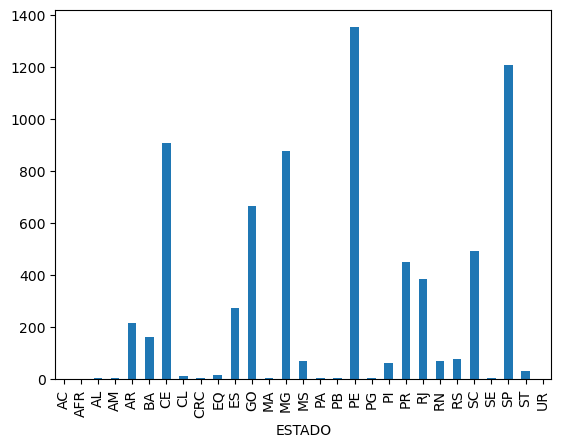

In [75]:
produtos_por_estado.plot(kind='bar')

In [76]:
df['PRODUTO'].value_counts(dropna=False)

PRODUTO
CLASSE                  681
NEON                    578
CHINO                   516
MAX                     483
CEDROSTRETCH 7 OZ       416
ACTIVE                  388
CEDROSTRETCH 9 OZ       374
CEDROFLEX 8 OZ          335
STREET                  331
CEDROLEVE               279
CODE                    259
CEDROBRIM               248
CRISTAL                 246
FLIP                    242
PAPER                   240
VIP                     204
ACTIVE SOFT             198
CRONOS                  190
CEDROCOTELE             181
WIN                     175
FRACTAL                 169
SPRINT 7,5 OZ           140
ORIGAMI                 139
DENIMCOLOUR 9,5 OZ      109
JUMP 9 OZ                76
PRISMA 9 OZ              51
TWIST BLACK              22
TWIST GREEN              16
WHITE COATED 9,5 OZ      12
COLOURS-CO/PES/PUE        9
APARAS                    8
COTELE STRETCH            7
TINTOS  100%  CO          6
CEDROCOR                  6
APARAS 555                5
DENIM COLOUR

<Axes: xlabel='PRODUTO'>

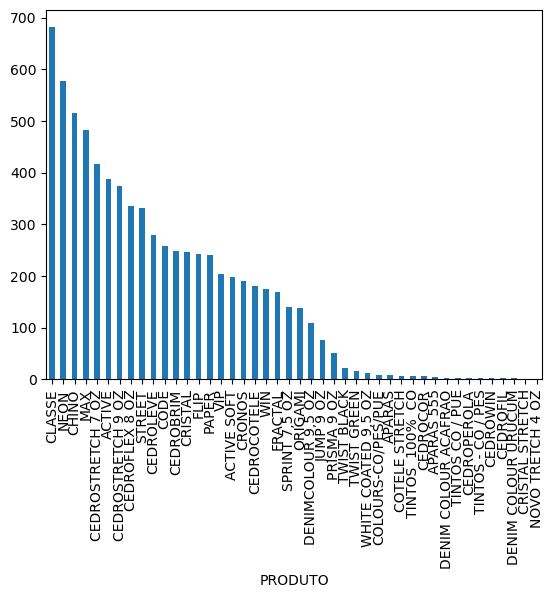

In [77]:
df['PRODUTO'].value_counts(dropna=False).plot(kind='bar')

In [78]:
def value_counts(df, column, top_n=30, dropna=False):

    absolute = df[column].value_counts(dropna=dropna)
    normalized = df[column].value_counts(dropna=dropna, normalize=True)
    
    if top_n is not None:
        absolute = absolute.head(top_n)
        normalized = normalized.head(top_n)

    return pd.DataFrame({
        'Absoluto': absolute,
        'Relativo': (normalized * 100).round(2)
    })

In [79]:
value_counts(df, 'PRODUTO')

,Absoluto,Relativo
PRODUTO,,
CLASSE,681,9.26
NEON,578,7.86
CHINO,516,7.01
MAX,483,6.56
CEDROSTRETCH 7 OZ,416,5.65
ACTIVE,388,5.27
CEDROSTRETCH 9 OZ,374,5.08
CEDROFLEX 8 OZ,335,4.55
STREET,331,4.50


In [80]:
# Cruzamento de dados
pd.crosstab(df['PRODUTO'], df['ESTADO'], margins=True)

ESTADO,AC,AFR,AL,AM,AR,BA,CE,CL,CRC,EQ,ES,GO,MA,MG,MS,PA,PB,PE,PG,PI,PR,RJ,RN,RS,SC,SE,SP,ST,UR,All
PRODUTO,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
ACTIVE,0,0,0,0,0,18,106,0,0,0,14,18,0,60,5,0,0,13,0,20,17,23,0,9,27,0,58,0,0,388
ACTIVE SOFT,0,0,0,0,0,15,33,0,0,0,8,14,0,60,2,0,0,13,0,0,3,12,0,4,3,0,31,0,0,198
APARAS,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,5,0,0,8
APARAS 555,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,3,0,0,5
CEDROBRIM,0,0,0,0,0,3,57,0,0,0,1,11,0,16,7,0,0,39,0,0,3,15,11,9,11,0,55,10,0,248
CEDROCOR,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,0,1,0,1,0,0,6
CEDROCOTELE,0,0,0,0,0,1,9,0,0,16,0,23,0,12,0,0,0,47,0,8,7,1,0,5,25,0,21,6,0,181
CEDROFIL,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2
CEDROFLEX 8 OZ,0,0,0,0,0,0,49,0,0,0,13,29,0,15,0,0,0,47,0,0,61,3,4,1,20,0,93,0,0,335


In [106]:
var = ['QTDVENDIDA', 'VLRVENDIDO', 'QTDFATURADA', 'VLRFATURADO']

In [111]:
df[var].mean().apply("{0:,.2f}".format)

QTDVENDIDA       530.45
VLRVENDIDO     3,000.44
QTDFATURADA      477.09
VLRFATURADO    2,730.16
dtype: object

In [114]:
df[var].median().apply("{0:,.2f}".format)

QTDVENDIDA     150.00
VLRVENDIDO     732.70
QTDFATURADA    134.62
VLRFATURADO    757.99
dtype: object

In [117]:
df[var].var().apply("{0:,.3f}".format)

QTDVENDIDA      1,191,524.265
VLRVENDIDO     41,485,906.117
QTDFATURADA       953,828.127
VLRFATURADO    33,257,125.635
dtype: object

In [120]:
df[var].std().apply("{0:,.3f}".format)

QTDVENDIDA     1,091.570
VLRVENDIDO     6,440.955
QTDFATURADA      976.641
VLRFATURADO    5,766.899
dtype: object

In [126]:
df[var].max().apply("{:,.2f}".format)

QTDVENDIDA      20,000.00
VLRVENDIDO     129,200.00
QTDFATURADA     20,047.64
VLRFATURADO    129,507.75
dtype: object

In [129]:
df[var].min().apply("{:,.2f}".format)

QTDVENDIDA     1.00
VLRVENDIDO     3.20
QTDFATURADA    1.00
VLRFATURADO    3.20
dtype: object

In [132]:
df[var].sum().apply("{:,.2f}".format)

QTDVENDIDA      3,903,053.15
VLRVENDIDO     22,077,259.93
QTDFATURADA     3,510,393.31
VLRFATURADO    20,088,553.97
dtype: object

In [135]:
df[var].skew().apply("{0:,.3f}".format)

QTDVENDIDA     4.888
VLRVENDIDO     5.126
QTDFATURADA    5.471
VLRFATURADO    5.860
dtype: object

In [139]:
df[var].kurt().apply("{0:,.3f}".format)

QTDVENDIDA     37.047
VLRVENDIDO     43.385
QTDFATURADA    49.599
VLRFATURADO    60.950
dtype: object

In [144]:
df1 = pd.DataFrame(StandardScaler().fit_transform(df[var]), columns=var)

In [151]:
df1.head()

,QTDVENDIDA,VLRVENDIDO,QTDFATURADA,VLRFATURADO
0,-0.027898,-0.054412,0.079180,0.036106
1,-0.027898,-0.054412,0.071592,0.029296
2,-0.394367,-0.374107,-0.390226,-0.375063
3,-0.394367,-0.374107,-0.390052,-0.374890
4,-0.394367,-0.374107,-0.375891,-0.360715


In [149]:
df[var].quantile(.10).apply("{0:,.2f}".format)

QTDVENDIDA     28.50
VLRVENDIDO     67.00
QTDFATURADA    28.96
VLRFATURADO    91.80
Name: 0.1, dtype: object

In [155]:
df['VLRFATURADO'].quantile([.01, .02, .05, .10, .25, .50, .75, .90, .95, .98, .99]).apply("{0:,.0f}".format)

0.01         4
0.02         5
0.05         9
0.10        92
0.25       341
0.50       758
0.75     2,593
0.90     6,475
0.95    12,407
0.98    23,524
0.99    29,035
Name: VLRFATURADO, dtype: object

Text(0.5, 1.0, 'Média valor vendido')

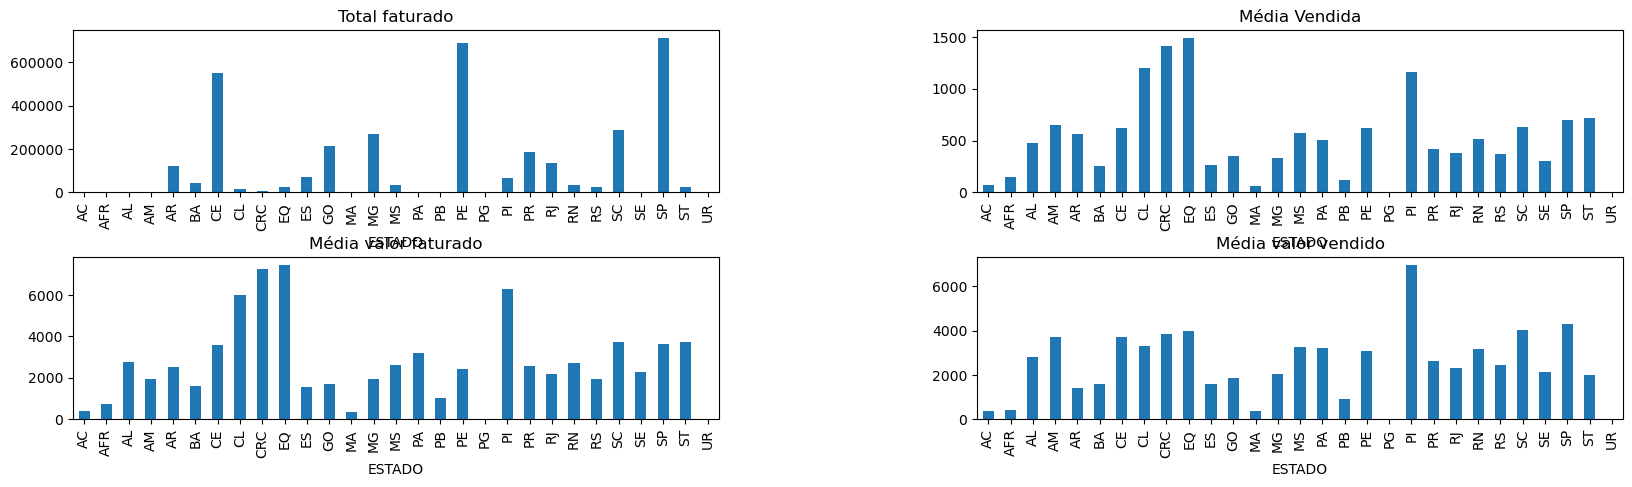

In [179]:
fig = plt.figure(figsize=[20,8])
fig.subplots_adjust(hspace=0.4, wspace=0.4)

plt.subplot(3,2,1)
df_gr = df.groupby('ESTADO')['QTDFATURADA'].sum()
df_gr.plot(kind='bar')
plt.title('Total faturado')

plt.subplot(3,2,2)
df_gr = df.groupby('ESTADO')['QTDVENDIDA'].mean()
df_gr.plot(kind='bar')
plt.title('Média Vendida')

plt.subplot(3,2,3)
df_gr = df.groupby('ESTADO')['VLRFATURADO'].mean()
df_gr.plot(kind='bar')
plt.title('Média valor faturado')

plt.subplot(3,2,4)
df_gr = df.groupby('ESTADO')['VLRVENDIDO'].mean()
df_gr.plot(kind='bar')
plt.title('Média valor vendido')
